In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/covid_data/covid_us_county.csv')
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

county_df = pd.read_csv("data/covid_data/us_county.csv")

In [3]:
county_data = county_df[county_df['county'].isin(['Los Angeles County', 'Ventura County'])]
pollution_lookup = {row['county'].replace('County', '').strip():row['population']  for index, row in county_data.iterrows()}
pollution_lookup

{'Los Angeles': 10098052, 'Ventura': 848112}

In [4]:
la = df[df['county']=='Ventura']

In [5]:
la.head(2)

,fips,county,state,lat,long,date,cases,state_code,deaths
38868,6111.0,Ventura,California,34.444657,-119.091061,2020-01-22,0,CA,0
38869,6111.0,Ventura,California,34.444657,-119.091061,2020-01-23,0,CA,0


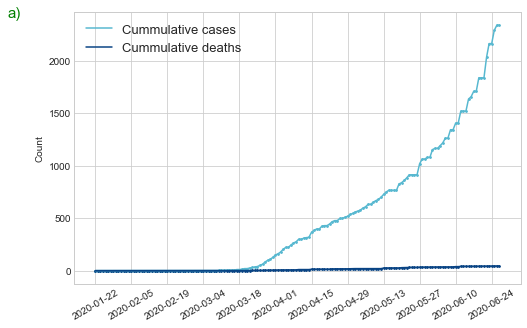

In [6]:
sns.set_style("whitegrid")


plt.close()
plt.clf()
cum_cases = la['cases'].tolist()
cum_deaths = la['deaths'].tolist()
x = list(range(len(cum_cases)))
x_ticks = la['date']
gap = 14

cmap = plt.get_cmap('GnBu')
color1, color2 = cmap(0.6), cmap(0.99)

fig, ax= plt.subplots(figsize=(8,5))
plt.plot(x, cum_cases, color=color1, label='Cummulative cases',)
plt.plot(x, cum_deaths, color=color2, label='Cummulative deaths')
plt.scatter(x, cum_cases, color=color1,  s=3)
plt.scatter(x, cum_deaths, color=color2,  s=3)
plt.legend(loc='upper left', prop={'size': 13})
plt.xticks(x[::gap], x_ticks[::gap], rotation=30)
ax.text(-0.15, 0.98, 'a)', transform=ax.transAxes, size=15, color='green')
      
plt.ylabel("Count")
plt.savefig("manuscript_images/SI_1_v.png", dpi=600)
plt.show()

In [7]:
def cases_by_pop(row):
    county = row['county']
    population = pollution_lookup[county]
    cases = row['cases']/float(population)
    return cases*100
   
def deaths_by_pop(row):
    county = row['county']
    population = pollution_lookup[county]
    deaths = row['deaths']/float(population)
    return deaths*100

def get_each_day_cases(x):
    return [x[i]-x[i-1] if i!=0 else x[i] for i in range(0, len(x))]


la['cases'] = la.groupby('county')['cases'].transform(lambda x: get_each_day_cases(x.tolist()))
la['cases'] = la.groupby('county')['cases'].transform(lambda x: x.rolling(7).mean())
la['cases'] = la['cases'].fillna(0)

la['deaths'] = la.groupby('county')['deaths'].transform(lambda x: get_each_day_cases(x.tolist()))
la['deaths'] = la.groupby('county')['deaths'].transform(lambda x: x.rolling(7).mean())
la['deaths'] = la['deaths'].fillna(0)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

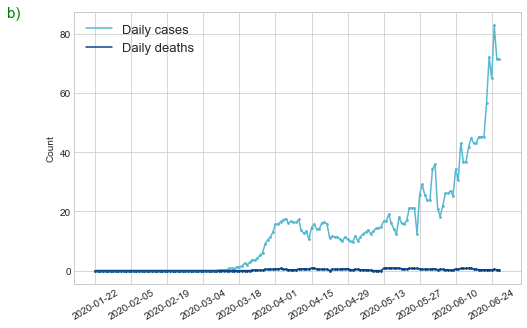

In [8]:
sns.set_style("whitegrid")


plt.close()
plt.clf()
cum_cases = la['cases'].tolist()
cum_deaths = la['deaths'].tolist()
x = list(range(len(cum_cases)))
x_ticks = la['date']
gap = 14

cmap = plt.get_cmap('GnBu')
color1, color2 = cmap(0.6), cmap(0.99)

fig, ax= plt.subplots(figsize=(8,5))
plt.plot(x, cum_cases, color=color1, label='Daily cases',)
plt.plot(x, cum_deaths, color=color2, label='Daily deaths')
plt.scatter(x, cum_cases, color=color1,  s=3)
plt.scatter(x, cum_deaths, color=color2,  s=3)
plt.legend(loc='upper left', prop={'size': 13})
plt.xticks(x[::gap], x_ticks[::gap], rotation=30)
ax.text(-0.15, 0.98, 'b)', transform=ax.transAxes, size=15, color='green')
      
plt.ylabel("Count")
plt.savefig("manuscript_images/SI_2_v.png", dpi=600)
plt.show()

In [9]:
la['cases'] = la.apply(cases_by_pop, axis=1)
la['deaths'] = la.apply(deaths_by_pop, axis=1)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


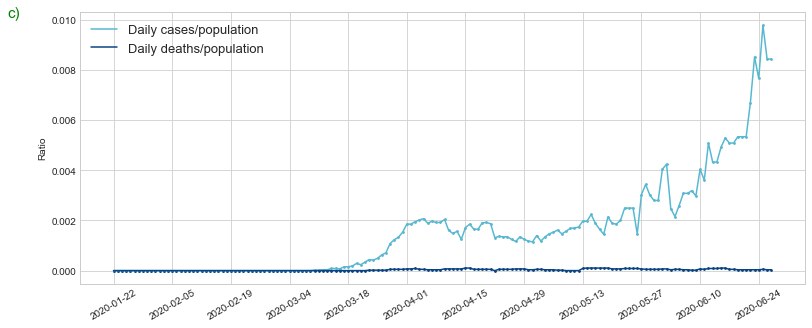

In [10]:
sns.set_style("whitegrid")


plt.close()
plt.clf()
cum_cases = la['cases'].tolist()
cum_deaths = la['deaths'].tolist()
x = list(range(len(cum_cases)))
x_ticks = la['date']
gap = 14

cmap = plt.get_cmap('GnBu')
color1, color2 = cmap(0.6), cmap(0.99)

fig, ax= plt.subplots(figsize=(13,5))
plt.plot(x, cum_cases, color=color1, label='Daily cases/population',)
plt.plot(x, cum_deaths, color=color2, label='Daily deaths/population')
plt.scatter(x, cum_cases, color=color1,  s=3)
plt.scatter(x, cum_deaths, color=color2,  s=3)
plt.legend(loc='upper left', prop={'size': 13})
plt.xticks(x[::gap], x_ticks[::gap], rotation=30)
ax.text(-0.1, 0.98, 'c)', transform=ax.transAxes, size=15, color='green')
      
plt.ylabel("Ratio")
plt.savefig("manuscript_images/SI_3_v.png", dpi=600)
plt.show()